# Exploring California Lakes with `geopandas`

This notebook covers the basics of getting started with Geospatial Data Analysis on SageMaker Studio Lab. 

We will explore publicly-available geographic datasets including Lake Shasta in California.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Download Data
Download shapely files that include the geographic data for California counties and water bodies. 
- The CA Counties dataset contains boundaries for CA State, counties and places from the US Census Bureau's 2016 MAF/TIGER database available at https://data.ca.gov/dataset/ca-geographic-boundaries . 
- The California water bodies dataset is published by California. Department of Fish and Game. Marine Resources Region and is available for download here - https://maps.princeton.edu/download/file/stanford-zx543xm6802-shapefile.zip 

After the files are downloaded, we need to unzip these in your local directories.


In [3]:
# Download and extract California counties dataset

ca_base_url = 'https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/b0007416-a325-4777-9295-368ea6b710e6/download/'
ca_data_file = 'ca-county-boundaries.zip'

if not os.path.isfile(ca_data_file):
    !wget -q {ca_base_url}{ca_data_file}
    !unzip -o {ca_data_file}

# Download and extract California lakes dataset

lakes_base_url = 'https://maps.princeton.edu/download/file/'
lakes_data_file = 'stanford-zx543xm6802-shapefile.zip'
if not os.path.isfile(lakes_data_file):
    !wget -q {lakes_base_url}{lakes_data_file}
    !unzip -o {lakes_data_file} -d ca_lakes

## Geographic EDA
Once downloaded, we can read the data and perform exploratory data analysis. We use the `geopanads` python package that makes it easy to read these shapefiles and create a `geopandas.DataFrame`.

In [4]:
file = 'CA_Counties/CA_Counties_TIGER2016.shp'
counties = gpd.read_file(file)
counties.shape

(58, 18)

In [5]:
# data check
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


Once you have the data in a `geopandas.DataFrame` you can easily visualize it. Like standard `pandas.DataFrames`, a `geopandas.DataFrame` has a handy plot method that you can use to create geographic visualizations.

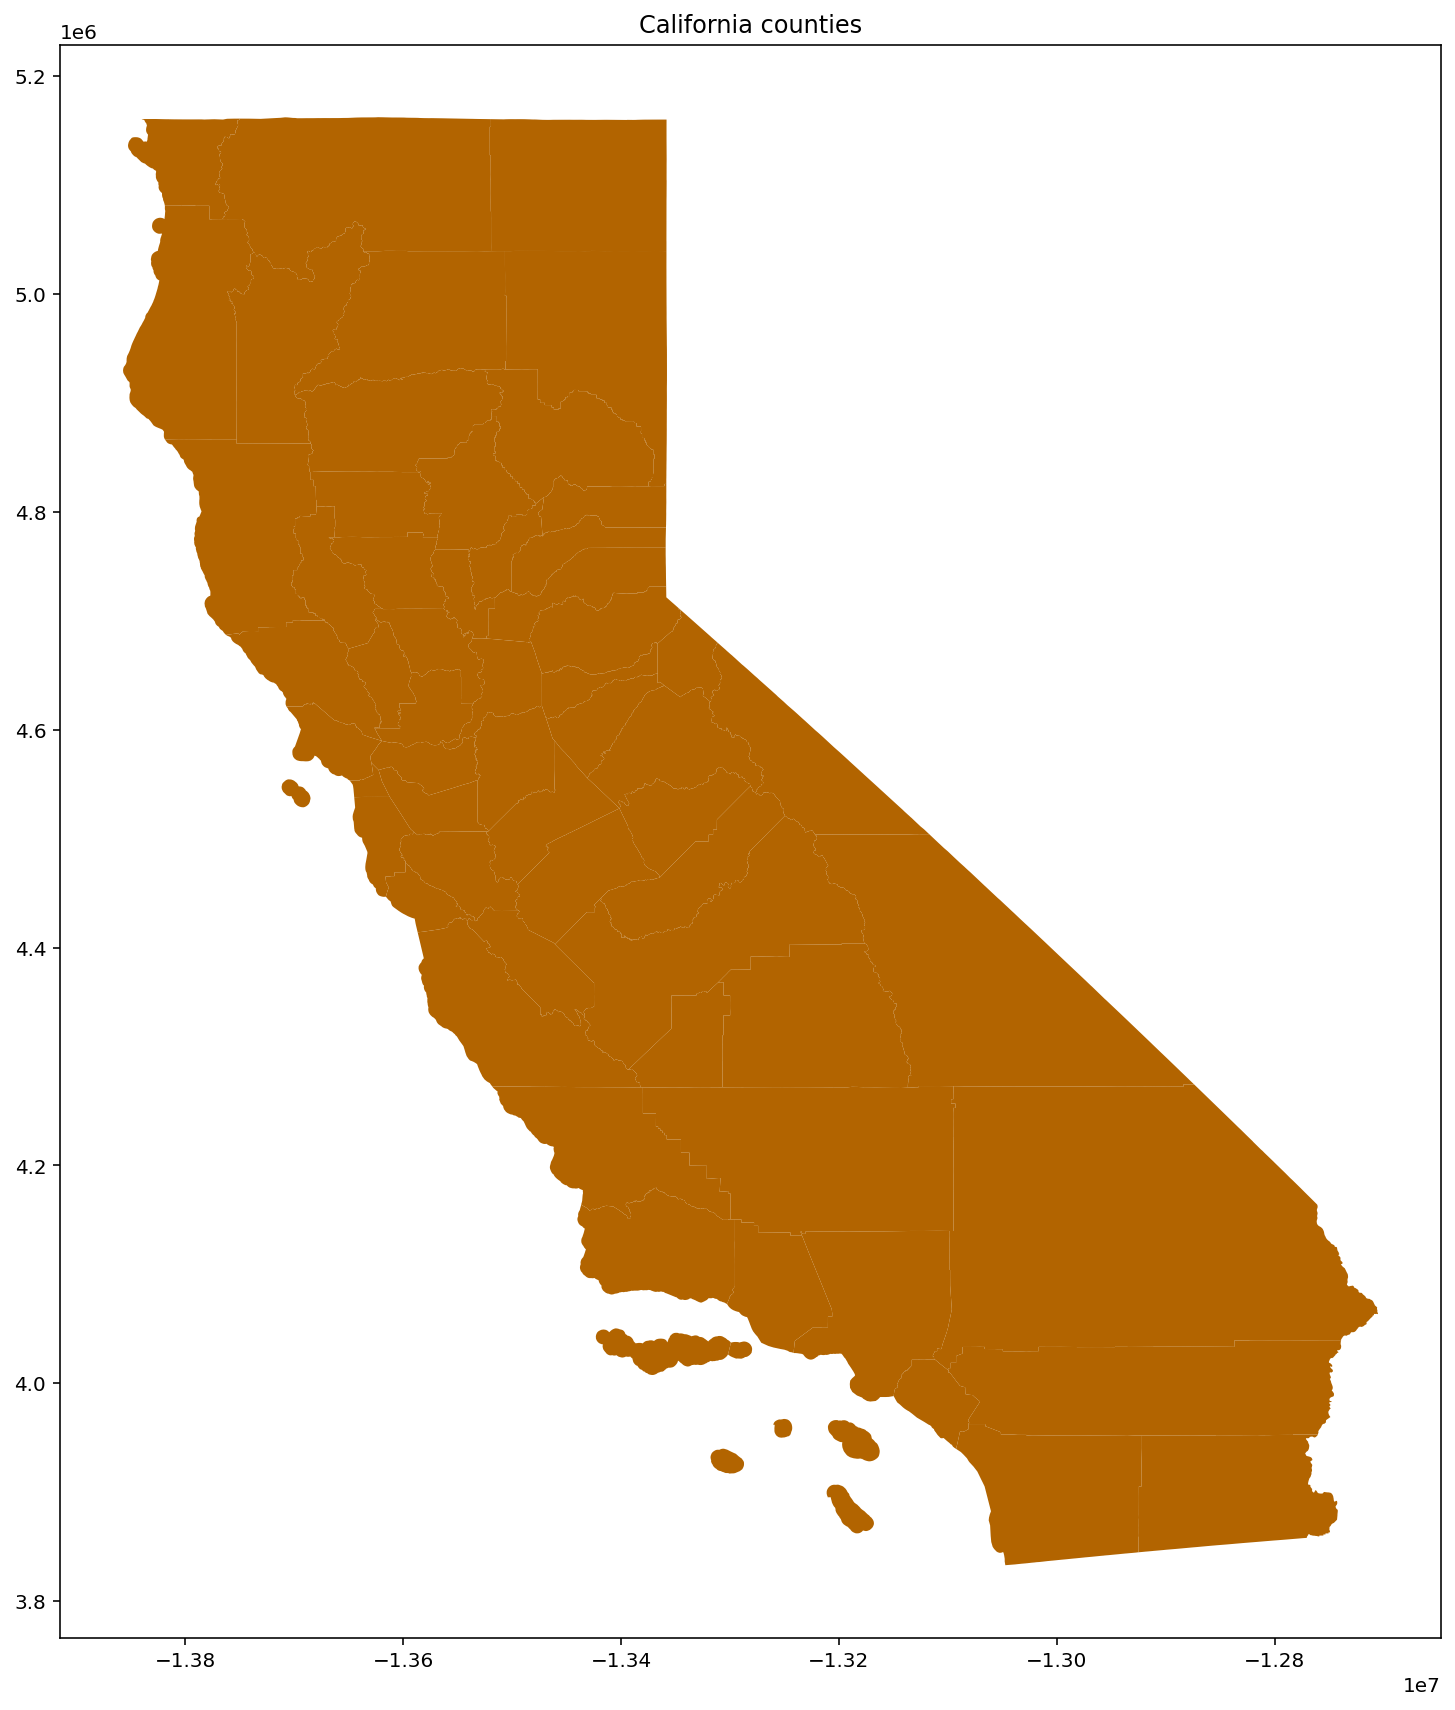

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
counties.plot(ax=ax,color='xkcd:umber')
plt.title("California counties")
plt.tight_layout()
plt.show()

Similarly we will read the California lakes shapefile into a `geopandas.DataFrame` and visualize it

In [7]:
file = 'ca_lakes/zx543xm6802.shp'
lakes = gpd.read_file(file)
lakes.shape #check shape

(27506, 17)

In [8]:
# data profile
lakes.head()

,dfgwaterid,type,name,gnis_name,gnis_id,county,quad_name,quad_code,lat_nad83,lon_nad83,utm_zone,utm_n_n83,utm_e_n83,mtr,elev_ft,sfc_acres,geometry
0,2,None,None,None,0.0,Siskiyou,COTTONWOOD PEAK,41122H6,41.995514,-122.634687,10.0,4.649343e+06,530256.529651,M48N 07W,2832,12.647377,"POLYGON Z ((-122.63289 41.99307 0.00000, -122...."
1,5,perennial,Azalea Lake,Azalea Lake,256390.0,Siskiyou,FIGUREHEAD MTN.,41123H3,41.969883,-123.300531,10.0,4.646476e+06,475099.025138,H18N 08E,5383,4.601394,"POLYGON Z ((-123.30003 41.96928 0.00000, -123...."
2,9,None,White Lake,White Lake,269006.0,Siskiyou,LOWER KLAMATH LAKE,41121H6,41.994778,-121.633244,10.0,4.650100e+06,613201.864414,M48N 03E,4093,814.471819,"MULTIPOLYGON Z (((-121.64562 41.99941 0.00000,..."
3,35,None,Bear Wallow,Bear Wallow,256730.0,Del Norte,BROKEN RIB MTN.,41123H6,41.950329,-123.654790,10.0,4.644469e+06,445729.565005,H18N 05E,4380,0.292219,"POLYGON Z ((-123.65462 41.95016 0.00000, -123...."
4,39,None,Mud Lake,Mud Lake,1657412.0,Siskiyou,DORRIS,41121H8,41.985547,-121.983720,10.0,4.648671e+06,584185.392854,M48N 01W,4763,11.463147,"POLYGON Z ((-121.98280 41.98446 0.00000, -121...."


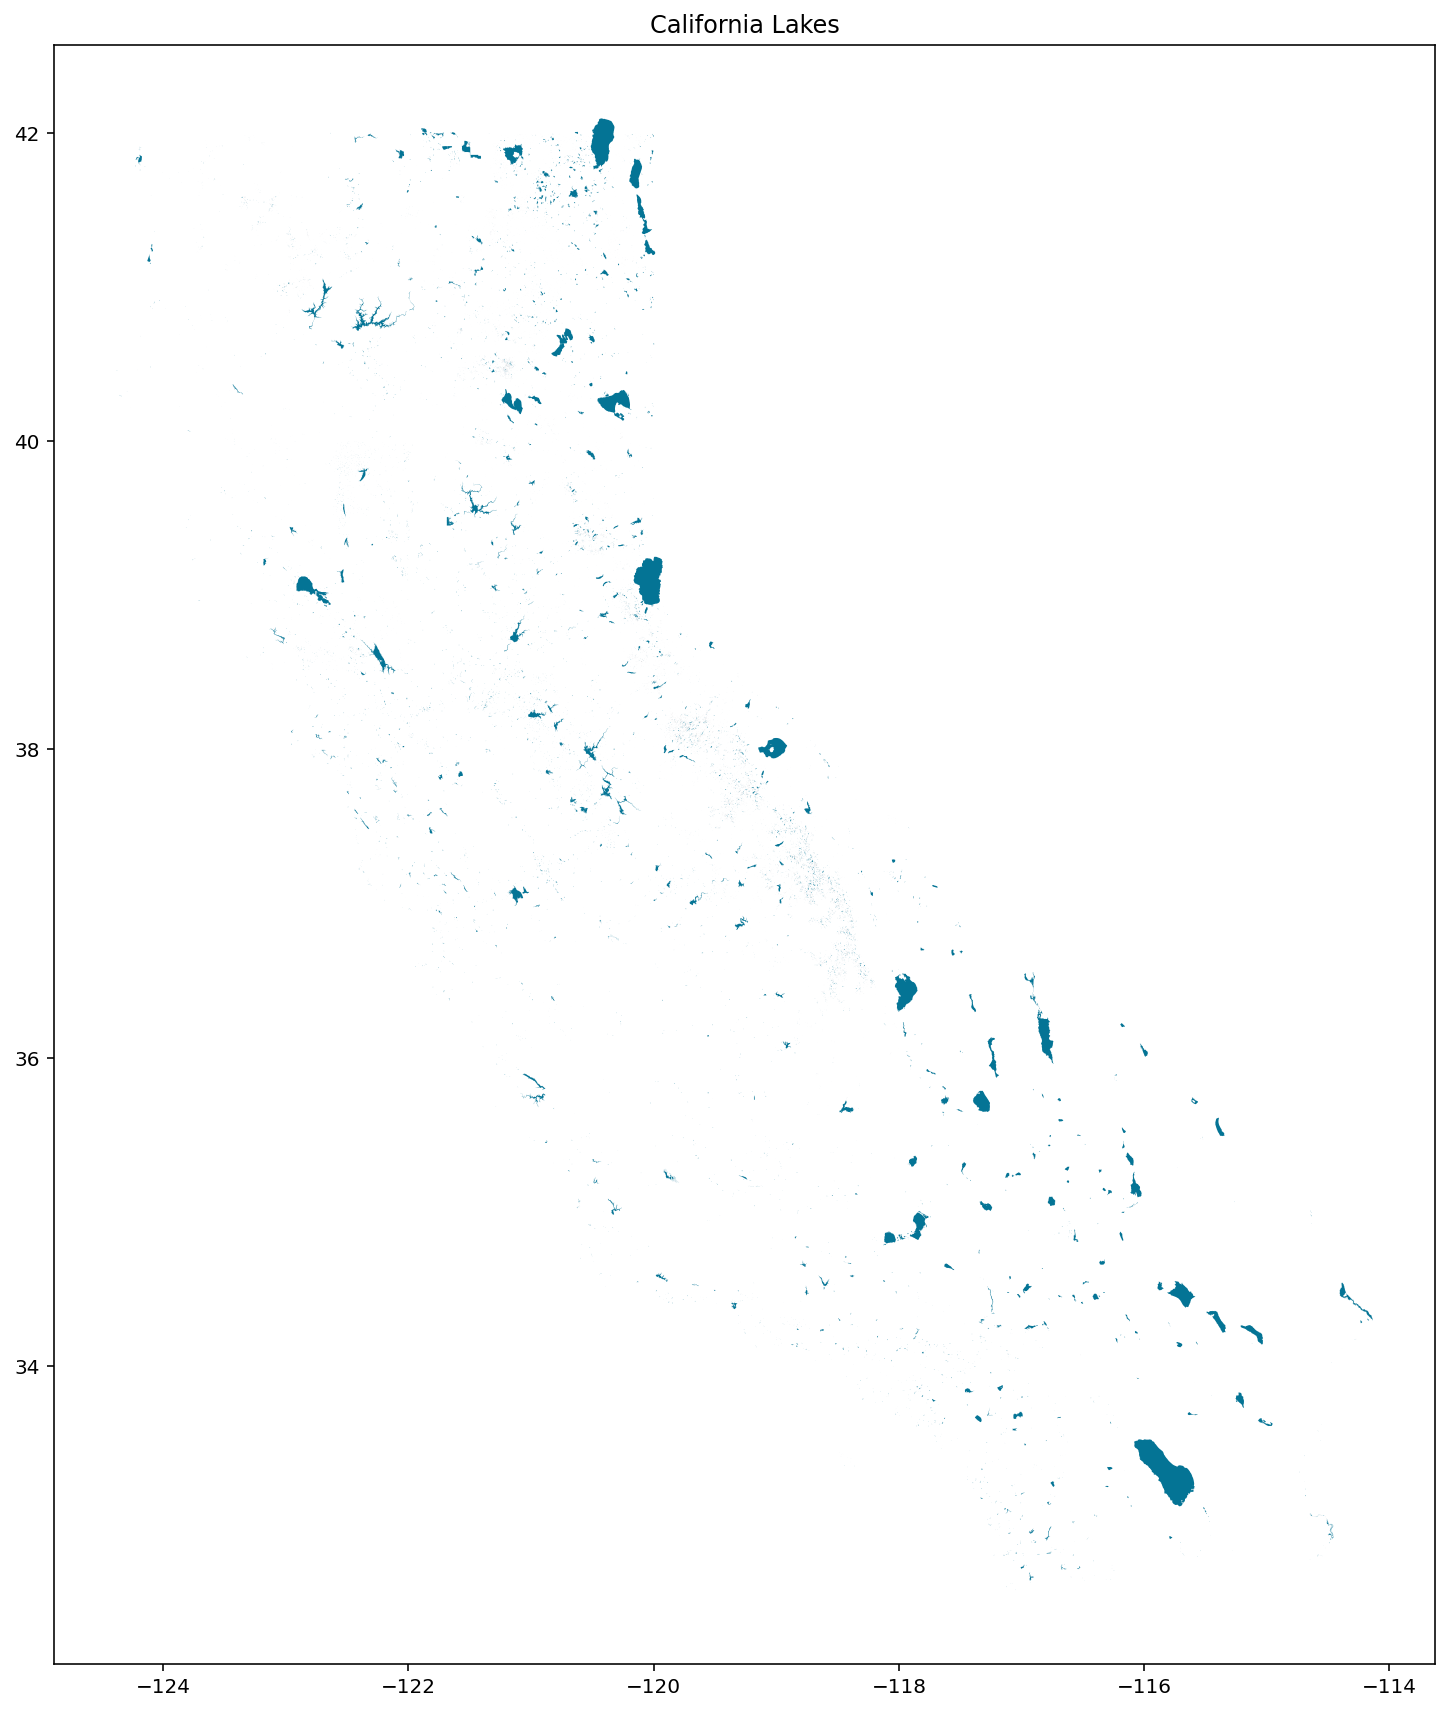

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
lakes.plot(ax=ax, color='xkcd:sea blue')
plt.title("California Lakes")
plt.tight_layout()
plt.show()

## Data Wrangling
Let's say we want to overlay the lakes data with the counties data and visualize the lakes along with California counties. Before we can do that,  we need to check and ensure they are projected using the same coordinate reference system (CRS). The `crs` attribute of a `geopanads.DataFrame` does exactly this.  

In [10]:
counties.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
lakes.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In our case the California counties and lakes data have different CRS.  So we will re-project the lakes to have the same CRS as counties.

In [12]:
# re-project lakes to epsg:3857
lakes_projected = lakes.to_crs({'init': 'epsg:3857'})

Once we have both the geographic datasets in the same CRS projection, we can overlay and visualize them. 

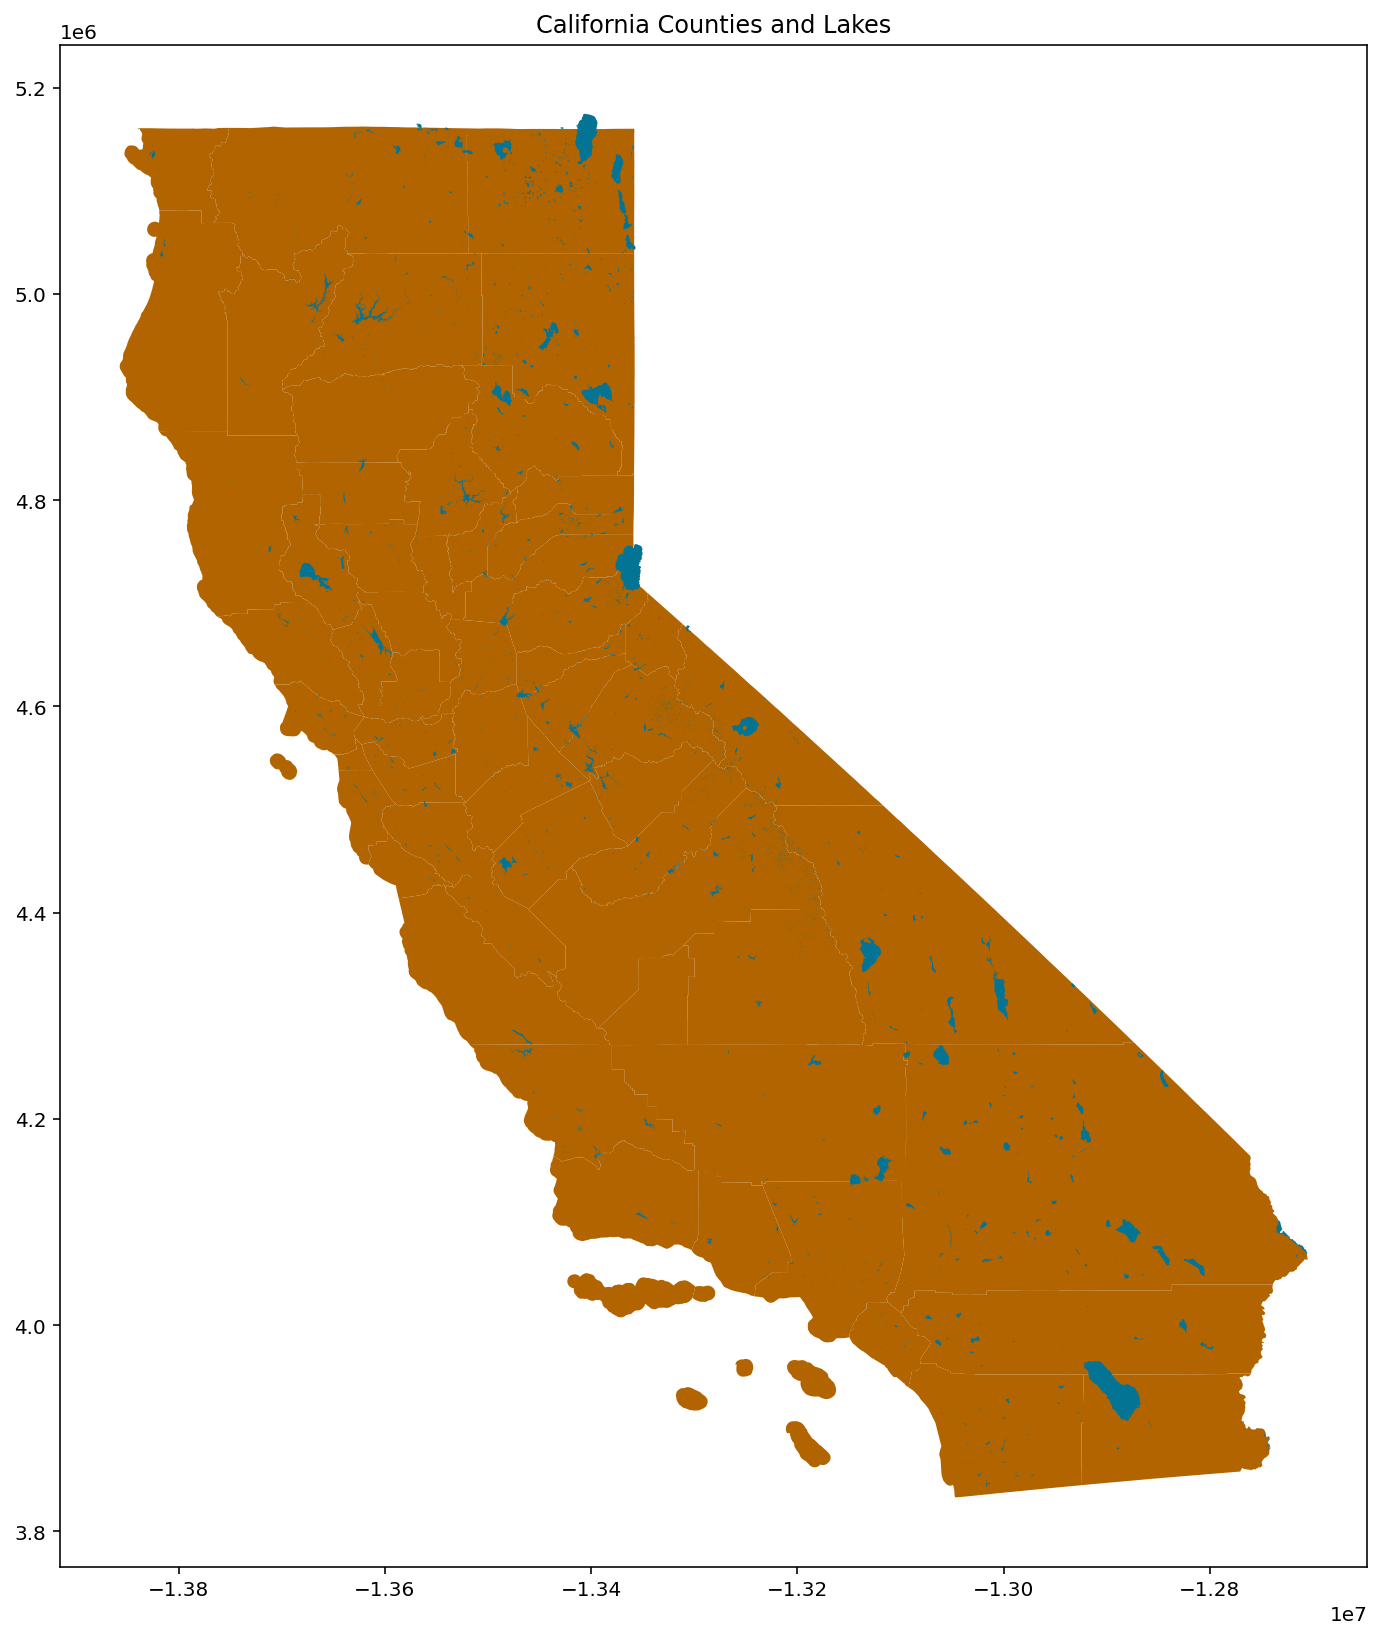

In [13]:
# visualize overlay
fig, ax = plt.subplots(figsize=(14,14))
counties.plot(ax=ax,color='xkcd:umber')
lakes_projected.plot(markersize=1, color='xkcd:sea blue',ax=ax)
plt.title("California Counties and Lakes")
plt.show()

#### Subset Selection
We can select a subset of data from the our `geopandas.DataFrame` to create a new `geopandas.DataFrame` for further analysis and visualization. For our example, let's focus on Lake Shasta. 

In [14]:
lake_shasta = lakes_projected[lakes_projected['name'] == "Lake Shasta"]
lake_shasta.head()

,dfgwaterid,type,name,gnis_name,gnis_id,county,quad_name,quad_code,lat_nad83,lon_nad83,utm_zone,utm_n_n83,utm_e_n83,mtr,elev_ft,sfc_acres,geometry
1218,784,perennial,Lake Shasta,Shasta Lake,253897.0,Shasta,O'BRIEN,40122G3,40.765934,-122.298688,10.0,4513010.636,559189.7561,M34N 04W,1069,28355.438839,MULTIPOLYGON Z (((-13618707.923 4990067.530 0....


#### Plotting Selection
Once we have our area of interest selected, it becomes easy to visualize and study it better.

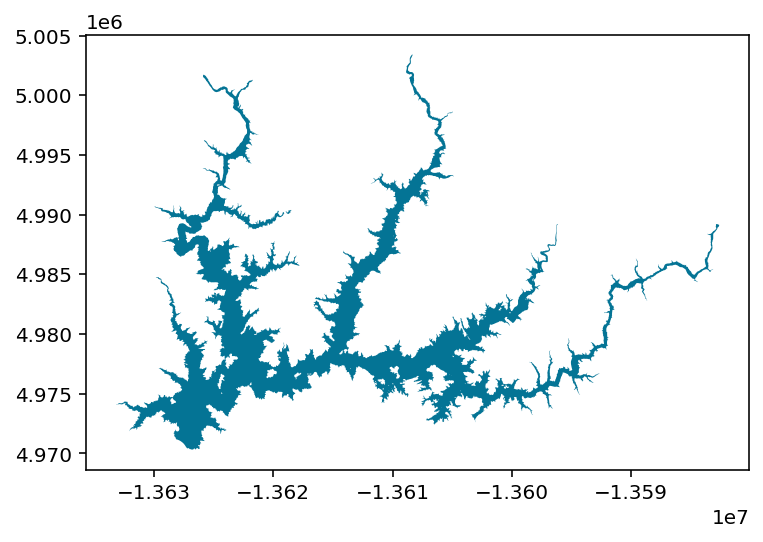

In [15]:
lake_shasta.plot(color='xkcd:sea blue');